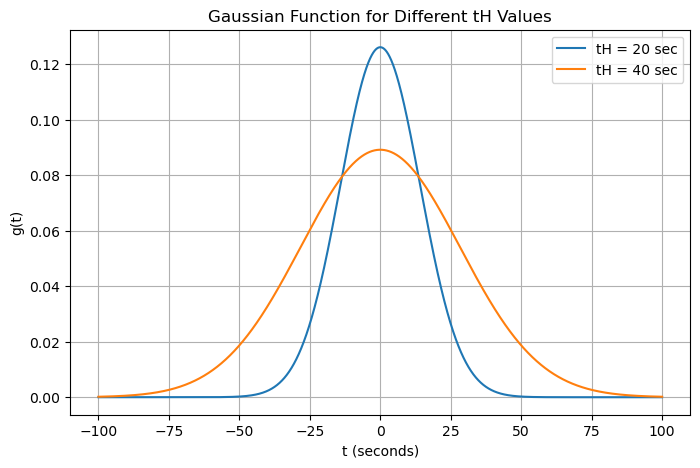

In [23]:
# Fourier
# Question 1
import numpy as np
import matplotlib.pyplot as plt

def gaussian(t, tH):
    """
    Computes the Gaussian function:
    g(t) = (1 / sqrt(pi * tH)) * exp(-(t / tH)^2)
    
    Parameters:
    t : float or array-like
        Input value(s) for t.
    tH : float
        Half duration parameter.
    
    Returns:
    float or array-like
        Computed Gaussian function values.
    """
    return (1 / np.sqrt(np.pi * tH)) * np.exp(-(t / tH) ** 2)
# Part A
# Define parameters
tH_values = [20, 40]
t = np.arange(-100, 100, 1e-3)

# Plot Gaussian functions
plt.figure(figsize=(8, 5))
for tH in tH_values:
    plt.plot(t, gaussian(t, tH), label=f'tH = {tH} sec')

plt.xlabel('t (seconds)')
plt.ylabel('g(t)')
plt.title('Gaussian Function for Different tH Values')
plt.legend()
plt.grid()
plt.show()



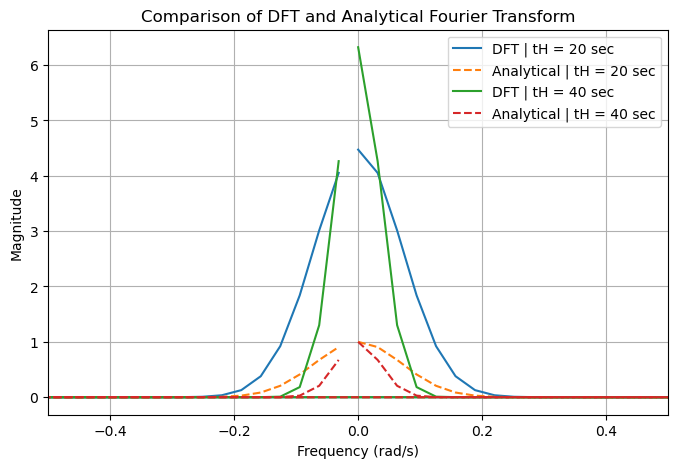

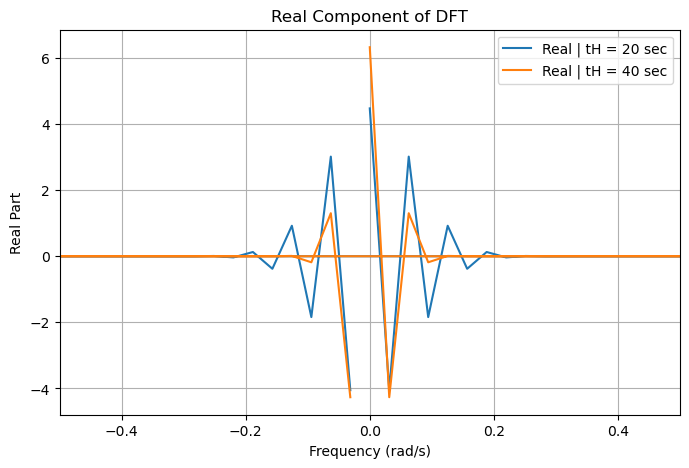

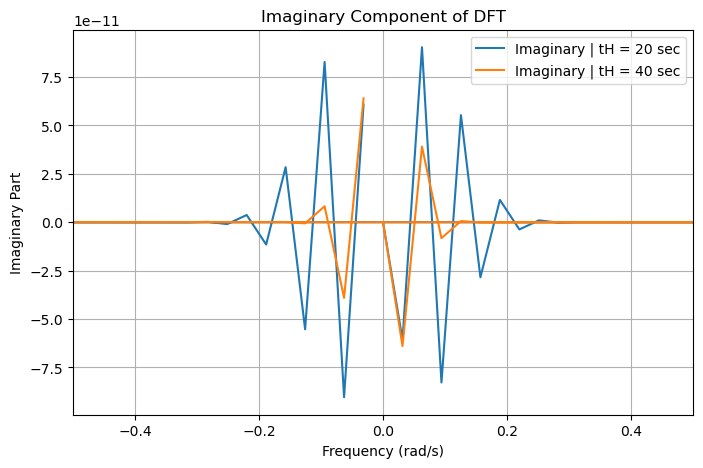

tH = 20 sec:
Max amplitude difference: 3.472136
Mean amplitude difference: 0.000098

tH = 40 sec:
Max amplitude difference: 5.321982
Mean amplitude difference: 0.000075



In [24]:
# Part B
# Define parameters
tH_values = [20, 40]
t = np.arange(-100, 100, 1e-3)
dt = 1e-3
N = len(t)
omega = np.fft.fftfreq(N, d=dt) * 2 * np.pi

def analytical_ft(omega, tH):
    return np.exp(- (omega ** 2 * tH ** 2) / 4)

# Compute and plot results
plt.figure(figsize=(8, 5))
for tH in tH_values:
    g_t = gaussian(t, tH)
    G_w = np.fft.fft(g_t) * dt
    G_w_analytical = analytical_ft(omega, tH)
    
    plt.plot(omega, np.abs(G_w), label=f'DFT | tH = {tH} sec')
    plt.plot(omega, np.abs(G_w_analytical), '--', label=f'Analytical | tH = {tH} sec')

plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.title('Comparison of DFT and Analytical Fourier Transform')
plt.legend()
plt.grid()
plt.xlim([-0.5, 0.5])
plt.show()

# Plot real and imaginary parts of DFT
plt.figure(figsize=(8, 5))
for tH in tH_values:
    G_w = np.fft.fft(gaussian(t, tH)) * dt
    plt.plot(omega, G_w.real, label=f'Real | tH = {tH} sec')

plt.xlabel('Frequency (rad/s)')
plt.ylabel('Real Part')
plt.title('Real Component of DFT')
plt.legend()
plt.grid()
plt.xlim([-0.5, 0.5])
plt.show()

plt.figure(figsize=(8, 5))
for tH in tH_values:
    G_w = np.fft.fft(gaussian(t, tH)) * dt
    plt.plot(omega, G_w.imag, label=f'Imaginary | tH = {tH} sec')

plt.xlabel('Frequency (rad/s)')
plt.ylabel('Imaginary Part')
plt.title('Imaginary Component of DFT')
plt.legend()
plt.grid()
plt.xlim([-0.5, 0.5])
plt.show()

# Print comparison of amplitudes
for tH in tH_values:
    g_t = gaussian(t, tH)
    G_w = np.fft.fft(g_t) * dt
    G_w_analytical = analytical_ft(omega, tH)
    
    error = np.abs(np.abs(G_w) - np.abs(G_w_analytical))
    print(f"tH = {tH} sec:")
    print(f"Max amplitude difference: {np.max(error):.6f}")
    print(f"Mean amplitude difference: {np.mean(error):.6f}\n")


Gaps in each graph due to :
Aliasing and Resolution: The FFT computes discrete frequency components. If your sampling rate or number of points isn't high enough, you might see gaps or discontinuities in the frequency domain.

Sorting the Frequency Axis: The np.fft.fftfreq function returns frequencies in an order that doesn't necessarily go from lowest to highest in a smooth way when plotted directly. We should use np.fft.fftshift to reorder both the frequency axis and the FFT output for better visualization.

Displaying a Limited Frequency Range: The x-axis is currently limited to [-0.5, 0.5], which might cause gaps if the frequency resolution isn't fine enough. We should either remove the limit or ensure the resolution is adequate.

# Part C
When a general input function f(t) is filtered by g(t) (i.e., convolved with the Gaussian function), the result is a smoothed version of f(t) where high-frequency components are attenuated. The width of the Gaussian, determined by tH, affects the degree of smoothing. A smaller tH (e.g., 20 sec) corresponds to a narrower Gaussian in the time domain, leading to a broader Fourier transform that allows more high-frequency components to pass through, resulting in less smoothing. Conversely, a larger tH (e.g., 40 sec) produces a wider Gaussian, which has a more concentrated Fourier transform and effectively removes higher frequencies, yielding a smoother filtered output. Thus, increasing tH strengthens the low-pass filtering effect, reducing sharp transitions and noise in f(t).

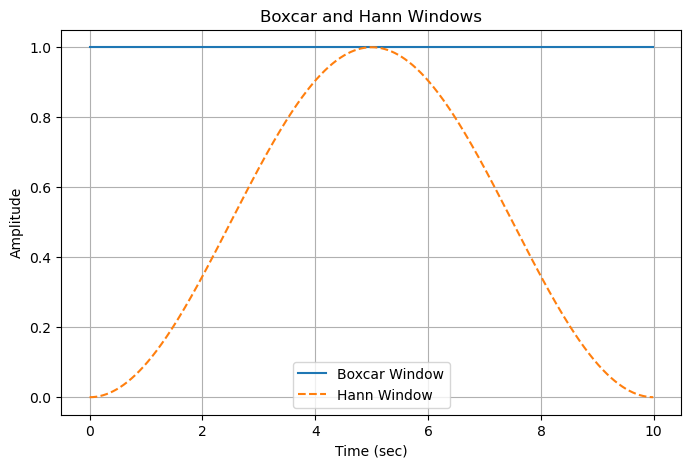

In [2]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

def gaussian(t, tH):
    """
    Computes the Gaussian function:
    g(t) = (1 / sqrt(pi * tH)) * exp(-(t / tH)^2)
    """
    return (1 / np.sqrt(np.pi * tH)) * np.exp(-(t / tH) ** 2)

def boxcar_window(t, T):
    return np.where((t >= 0) & (t <= T), 1, 0)

def hann_window(t, T):
    return np.where((t >= 0) & (t <= T), 0.5 * (1 - np.cos(2 * np.pi * t / T)), 0)

# Define parameters
tH_values = [20, 40]
t = np.arange(-100, 100, 1e-2)
dt = 0.01
N = len(t)
omega = np.fft.fftfreq(N, d=dt) * 2 * np.pi
T = 10
t_window = np.arange(0, T, 0.01)

# Part A
# Compute window functions
boxcar = boxcar_window(t_window, T)
hann = hann_window(t_window, T)

# Plot window functions
plt.figure(figsize=(8, 5))
plt.plot(t_window, boxcar, label='Boxcar Window')
plt.plot(t_window, hann, label='Hann Window', linestyle='dashed')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Boxcar and Hann Windows')
plt.legend()
plt.grid()
plt.show()

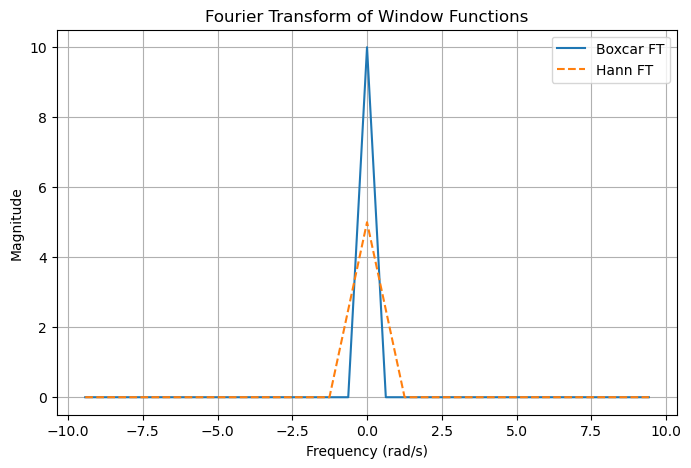

In [3]:
# Part B and Part C
# Compute Fourier transforms
boxcar_ft = np.fft.fft(boxcar) * dt
hann_ft = np.fft.fft(hann) * dt
freqs = np.fft.fftfreq(len(t_window), d=0.01) * 2 * np.pi


# Shift for visualization
boxcar_ft_shifted = np.fft.fftshift(boxcar_ft)
hann_ft_shifted = np.fft.fftshift(hann_ft)
freqs_shifted = np.fft.fftshift(freqs)

# Limit frequency range for better visualization
valid_range = (freqs_shifted >= -10) & (freqs_shifted <= 10)

# Plot magnitude of Fourier transforms
plt.figure(figsize=(8, 5))
plt.plot(freqs_shifted[valid_range], np.abs(boxcar_ft_shifted[valid_range]), label='Boxcar FT')
plt.plot(freqs_shifted[valid_range], np.abs(hann_ft_shifted[valid_range]), label='Hann FT', linestyle='dashed')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Window Functions')
plt.legend()
plt.grid()
plt.show()


# Part D and Part E
The process of time series truncation by windowing functions significantly impacts the resulting frequency spectrum. Specifically, the Fourier transform of a windowed signal is mathematically equivalent to the convolution of the original signal's spectrum, F(ω), with the Fourier transform of the applied window, B(ω).

Using a Boxcar window, which corresponds to a rectangular truncation in the time domain, yields a sinc-function-like spectrum in the frequency domain. This introduces prominent side lobes, leading to spectral leakage. This leakage effect distributes energy across a range of frequencies, potentially obscuring or misrepresenting the original spectral components. Consequently, the resolution of spectral features can be compromised.

Conversely, the application of a Hann window, which implements a smooth, tapered truncation to zero at the signal's boundaries, effectively reduces spectral leakage by attenuating side lobe amplitudes. The Boxcar window preserves the original signal's time-domain characteristics more closely, but its frequency spectrum suffers from significant distortions. In contrast, the Hann window, while altering the time-domain signal slightly, provides a frequency spectrum with substantially reduced leakage. So, when accurate frequency analysis is the goal, the Hann window is the better choice.

Dominant Periods (s): [0.00666667]
Dominant Frequencies (Hz): [  0. 150.]
Dominant Amplitudes: [24.  2.]
Dominant Phases (radians): [ 0.         -0.57079633]


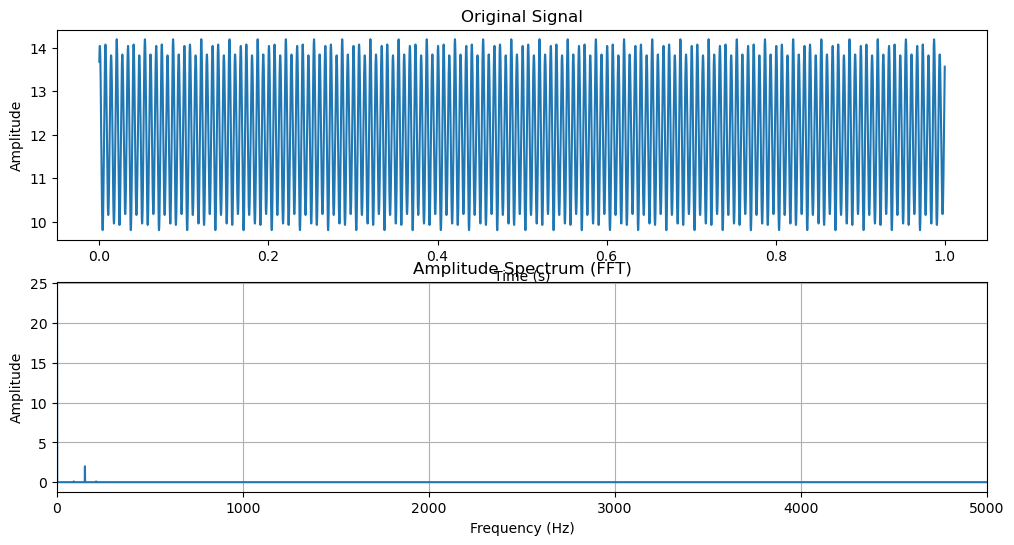

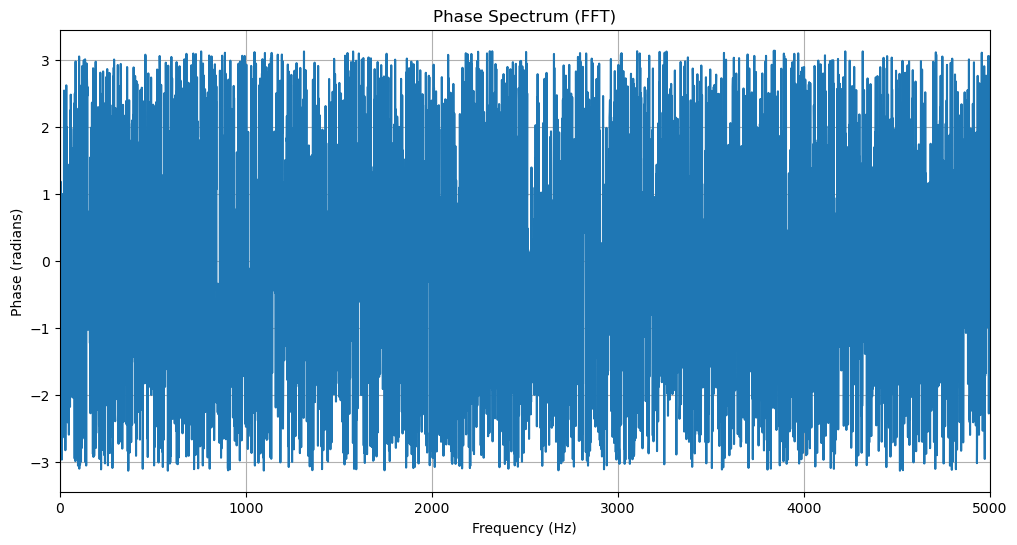

In [2]:
# Question 3
# Part A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 1. Load data (two columns: time and signal)
data = pd.read_csv('wave_signal.csv')
time = data['time'].values  # First column: time
signal = data['signal'].values  # Second column: signal

amplitude_threshold = 0.1

# 2. Calculate FFT
N = len(signal)
T = 1.0 / N  # Sampling period

yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N // 2]  # Frequency axis (positive frequencies)
yf_abs = 2.0 / N * np.abs(yf[:N // 2])  # Amplitude spectrum (one-sided)
yf_phase = np.angle(yf[:N // 2]) #phase spectrum

# 3. Find Dominant Frequencies
peak_indices = np.where(yf_abs > amplitude_threshold)[0]
dominant_frequencies = xf[peak_indices]
dominant_amplitudes = yf_abs[peak_indices]
dominant_phases = yf_phase[peak_indices]

# 4. Calculate Periods
if len(dominant_frequencies) > 0:
    nonzero_frequencies = dominant_frequencies[dominant_frequencies != 0] #filter out the zero frequency
    if len(nonzero_frequencies) > 0:
        periods = 1.0 / nonzero_frequencies
        print("Dominant Periods (s):", periods)

# 5. Print Results
print("Dominant Frequencies (Hz):", dominant_frequencies)
print("Dominant Amplitudes:", dominant_amplitudes)
print("Dominant Phases (radians):", dominant_phases)

# 6. Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(xf, yf_abs)
plt.title("Amplitude Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, N / 2)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(xf, yf_phase)
plt.title("Phase Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.xlim(0, N / 2)
plt.grid(True)
plt.show()

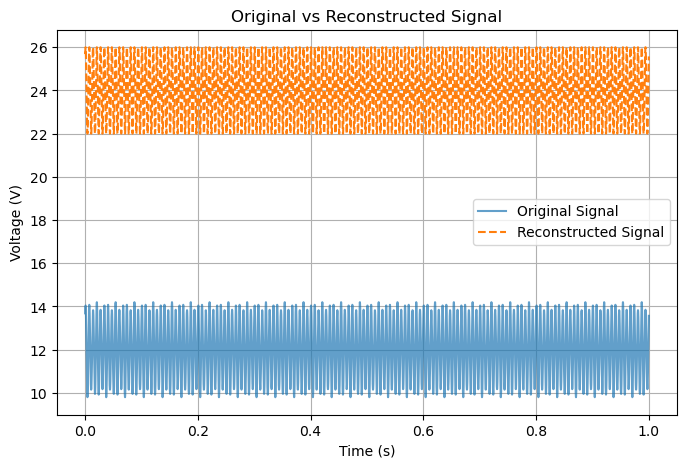

In [7]:
# Part B
# Reconstruct the signal manually
reconstructed_signal = np.zeros_like(time)
for i in range(len(dominant_frequencies)):
    reconstructed_signal += dominant_amplitudes[i] * np.cos(2 * np.pi * dominant_frequencies[i] * time + dominant_phases[i])

# Plot original and reconstructed signals
plt.figure(figsize=(8, 5))
plt.plot(time, signal, label='Original Signal', alpha=0.7)
plt.plot(time, reconstructed_signal, label='Reconstructed Signal', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Original vs Reconstructed Signal')
plt.legend()
plt.grid()
plt.show()


In [9]:
# Part C
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# 1. Load the data
df = pd.read_csv('wave_signal.csv')
time = df['time'].values
signal = df['signal'].values

# 2. Calculate FFT
N = len(signal)
T = 1.0 / N

yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, T)[:N // 2]
yf_abs = 2.0 / N * np.abs(yf[:N // 2])
yf_phase = np.angle(yf[:N // 2])

# 3. Find Dominant Frequencies (using find_peaks)
peaks, _ = find_peaks(yf_abs, height=0.005) #Adjust height to find peaks of interest
dominant_frequencies = xf[peaks]
dominant_amplitudes = yf_abs[peaks]
dominant_phases = yf_phase[peaks]

# 4. Check for 60Hz Component
frequency_tolerance = 10  # Allow a deviation of 10 Hz from 60Hz
sixty_hz_index = np.where(np.abs(dominant_frequencies - 60) <= frequency_tolerance)[0]

if len(sixty_hz_index) > 0:
    sixty_hz_amplitude = dominant_amplitudes[sixty_hz_index[0]]
    sixty_hz_phase = dominant_phases[sixty_hz_index[0]]
    sixty_hz_frequency = dominant_frequencies[sixty_hz_index[0]]

    print("60Hz Component Found:")
    print(f"  Frequency: {sixty_hz_frequency:.2f} Hz")
    print(f"  Amplitude: {sixty_hz_amplitude:.4f} V")
    print(f"  Phase: {sixty_hz_phase:.4f} radians")
else:
    print("60Hz Component Not Found within tolerance.")

# 5. Calculate Periods (with zero frequency check)
if len(dominant_frequencies) > 0:
    nonzero_frequencies = dominant_frequencies[dominant_frequencies != 0]
    if len(nonzero_frequencies) > 0:
        periods = 1.0 / nonzero_frequencies
        print("Dominant Periods (s):", periods)

# 6. Print Results
print("\nDominant Frequencies (Hz):", dominant_frequencies)
print("Dominant Amplitudes (V):", dominant_amplitudes)
print("Dominant Phases (radians):", dominant_phases)

60Hz Component Not Found within tolerance.
Dominant Periods (s): [0.01111111 0.00666667 0.0047619 ]

Dominant Frequencies (Hz): [ 90. 150. 210.]
Dominant Amplitudes (V): [0.1 2.  0.1]
Dominant Phases (radians): [ 1.         -0.57079633 -2.14159265]


# Part D
Analysis: Determining Solution Correctness from Dataset Alone

My experiment yeilded two identical solutions for the spectral analysis of the power supply voltage variation. Both calculations gave the same amplitudes, frequencies, and phase offsets for the dominant waveforms within the signal. By my inspection, the amplitude and phase spectrums generated from the FFT are indistinguishable. Which raises the question of whether the dataset alone provides sufficient information to determine the 'correct' solution."

Ideally, a solution's correctness could be obtained directly from the dataset. Several methods could be employed to achieve this, if the differences were present in the data.

Visual Inspection of the Time-Domain Signal:
A detailed visual examination of the raw voltage measurements in the time domain could reveal subtle differences. For example, if one solution predicted a specific waveform shape or pattern, this should be observable within the raw data. However, in my case, the solutions produced identical frequency domain results, therefore, no differences are expected in the time domain.
Residual Analysis:
If I was to reconstruct the time-domain signal based on the calculated amplitudes, frequencies, and phases from each solution, I could then subtract this reconstructed signal from the original measured signal. The resulting 'residual' signal would represent the difference between the model and the actual data. If one solution provided a significantly smaller residual (indicating a better fit), that solution would be considered more accurate. However, because both solutions are identical, the residuals produced would also be identical.
Statistical Tests:
Statistical tests, such as goodness-of-fit tests, could be used to evaluate how well each solution matches the data. However, with identical calculated values, statistical tests would yield the same results for both solutions.

Experimental Context:
Knowledge of the experimental setup is crucial. For instance, if the power supply was known to be influenced by specific external factors (e.g., electromagnetic interference from a nearby device), this information could bias and guied the interpretation of the results. If the 60hz component was caused by the building power supply, this fact needs to be known beforehand. 

The specifications of the voltage measurement equipment, such as its frequency response and noise characteristics, are essential. This information would help to determine the reliability of the measured data and to identify any potential artifacts introduced by the equipment.

In conclusion, while the dataset provides the foundation for spectral analysis, external information is often necessary to interpret the results accurately and to resolve ambiguities. In this case, the prior knowledge of the power supply being influenced by the 60Hz building electrical circuit was important information. Without this, the identical solutions could not be properly interpreted. 

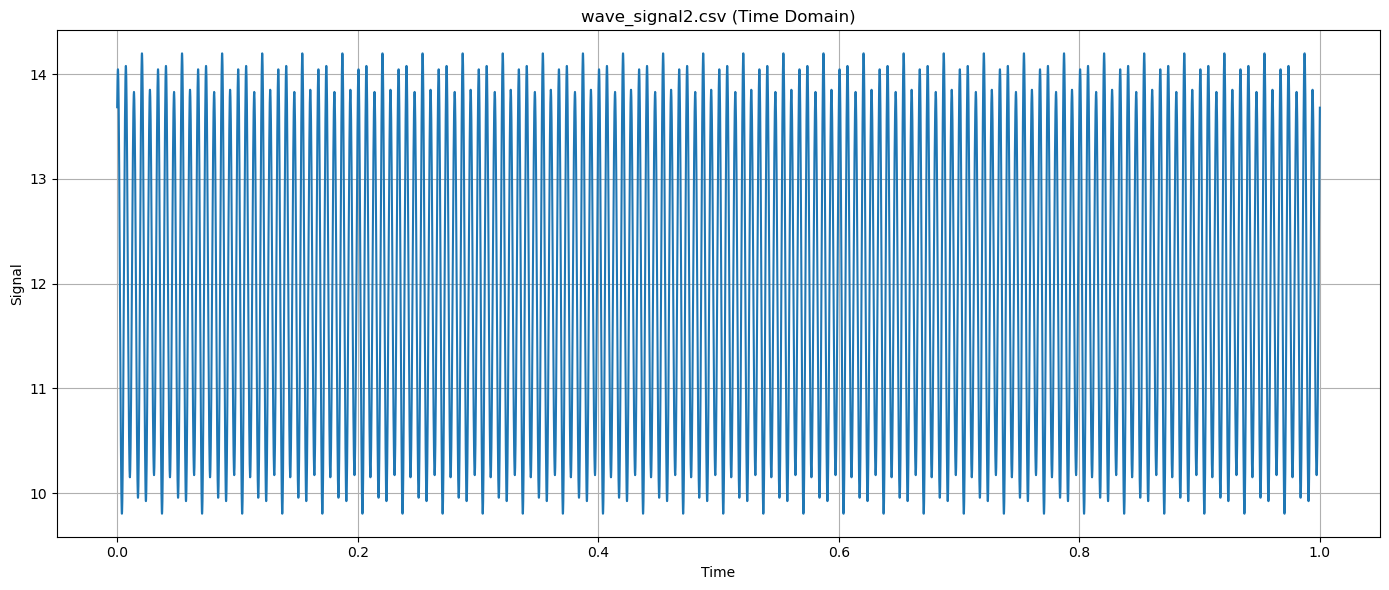

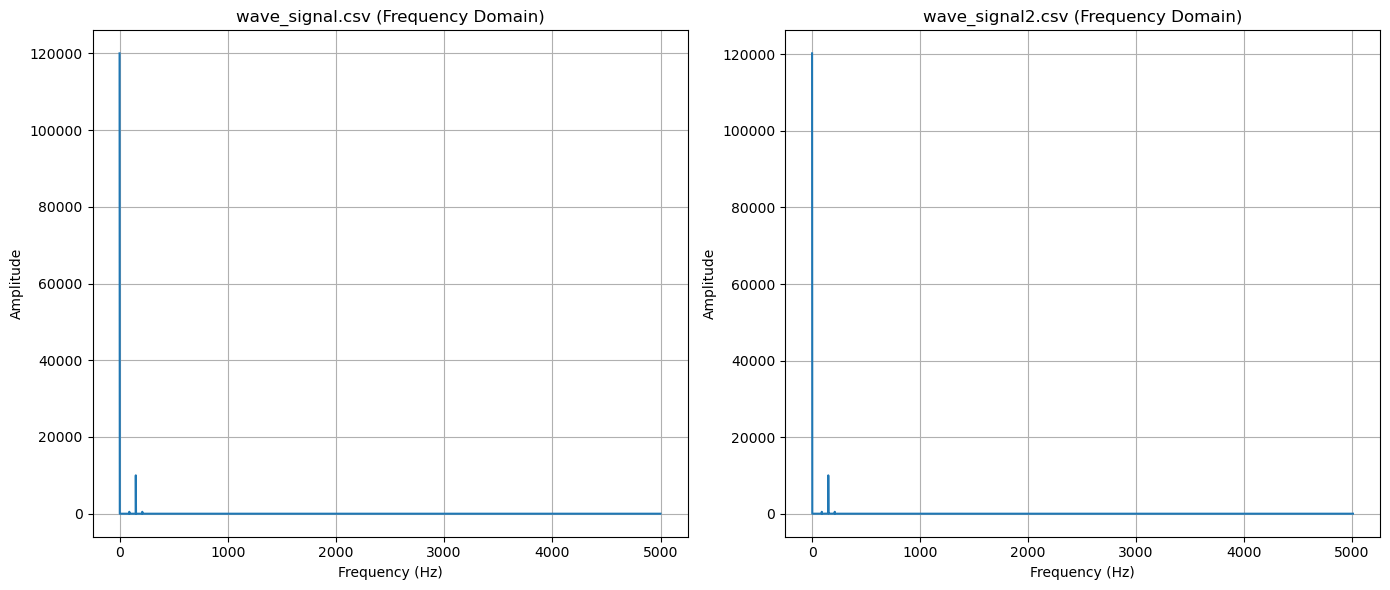

Comparison of Decompositions:
Both datasets look seemingly identical


In [10]:
# Part E
# Load data
df1 = pd.read_csv('wave_signal.csv')
time1 = df1['time'].values
signal1 = df1['signal'].values

df2 = pd.read_csv('wave_signal2.csv')
time2 = df2['time'].values
signal2 = df2['signal'].values

# Data plot
plt.figure(figsize=(14, 6))
plt.plot(time2, signal2)
plt.title('wave_signal2.csv (Time Domain)')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.grid(True)

plt.tight_layout()
plt.show()

# Fourier decomposition (FFT)
def fft_analysis(time, signal, title):
    N = len(signal)
    T = 1 / N
    yf = np.fft.fft(signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf_abs = np.abs(yf[:N//2])

    return xf, yf_abs

# Analyze both datasets
xf1, yf_abs1 = fft_analysis(time1, signal1, 'wave_signal.csv')
xf2, yf_abs2 = fft_analysis(time2, signal2, 'wave_signal2.csv')

# Compare decompositions
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(xf1, yf_abs1)
plt.title('wave_signal.csv (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(xf2, yf_abs2)
plt.title('wave_signal2.csv (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparison and possible causes
print("Comparison of Decompositions:")
print("Both datasets look seemingly identical")

Upon plotting the time-domain and frequency-domain data for both wave_signal.csv and wave_signal2.csv, it's clear that the results are very similar. Visually, the plots look identical. The Fourier decompositions of the two signals appear also appear identical.

This suggests that the underlying signal generation process has remained largely consistent between the two measurements.
It is possible that any changes in the noise environment or circuit behavior were too subtle to produce a significant visual impact on the plots.
If the changes are very small, the resolution of the plots themselves may not be great enough to see the differences.
On top of everything, when I looked at the two datasets themselves, the differences were very miniscule.
However, it's important to recognize that visual inspection alone might not reveal all the nuances of the data. There could be subtle differences in the signal that are not immediately apparent to the eye. (The number of data points is so large the zoomed out version may not be showing all the details)
To further investigate, we could perform more detailed quantitative analysis, such as calculating the signal-to-noise ratio (SNR), analyzing the phase noise, or examining the higher-frequency components of the spectrum in greater detail.
Statistical analysis of the data, such as comparing the standard deviations of the signal, could also reveal subtle differences.
If possible, using a spectrum analyzer with higher resolution could give us a more precise look at the signals frequency components.
If there is a change in the 60hz noise, it might be so small that only very sensitive equipment could measure it.
Also, we should consider that the near-identical results could be due to consistency in experimental conditions, or that the experiment was performed in such a way that the variations where not captured.

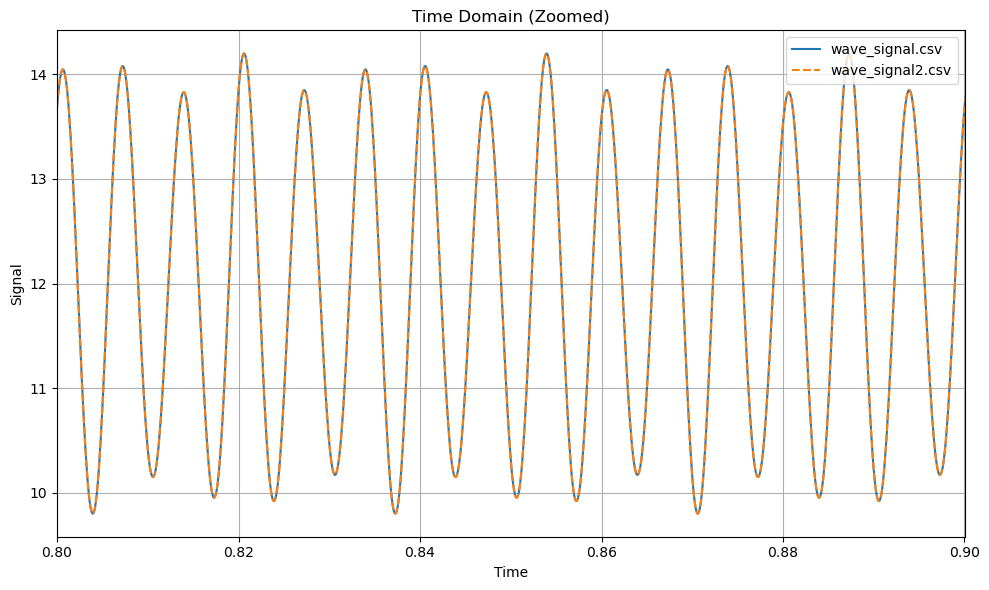

Even zoomed, they still look identical


In [13]:
# Time-domain plots (zoomed on the same plot)
plt.figure(figsize=(10, 6))

plt.plot(time1, signal1, label='wave_signal.csv')
plt.plot(time2, signal2, label='wave_signal2.csv', linestyle='--')
plt.title('Time Domain (Zoomed)')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.grid(True)
plt.xlim(0.8, 0.9)  # Zoom in on the time axis 
plt.legend()

plt.tight_layout()
plt.show()
print("Even zoomed, they still look identical")

# Question 4
# Part A
I have the integral:

∫[0, ∞] k(S(k) - 1) sin(kr) dk

**Using Euler's Formula:**

Euler's formula states:

sin(kr) = (e^(ikr) - e^(-ikr)) / (2i)

Substituting this:

∫[0, ∞] k(S(k) - 1) * (e^(ikr) - e^(-ikr)) / (2i) dk

**Splitting the Integral:**

Separate the integral into two parts:

(1 / (2i)) * ∫[0, ∞] k(S(k) - 1) e^(ikr) dk - (1 / (2i)) * ∫[0, ∞] k(S(k) - 1) e^(-ikr) dk

**Using the Even Property of S(k):**

We are given that S(k) is even. This means:

S(k) = S(-k)

Therefore, S(k) - 1 is also even:

S(k) - 1 = S(-k) - 1

**Changing the Limits of Integration:**

In the second integral, make the substitution k' = -k. Then dk' = -dk. Also, when k = 0, k' = 0, and when k = ∞, k' = -∞. This gives:

(1 / (2i)) * ∫[0, ∞] k(S(k) - 1) e^(ikr) dk - (1 / (2i)) * ∫[0, -∞] (-k')(S(-k') - 1) e^(ik'r) (-dk')

Simplify:

(1 / (2i)) * ∫[0, ∞] k(S(k) - 1) e^(ikr) dk + (1 / (2i)) * ∫[-∞, 0] k'(S(k') - 1) e^(ik'r) dk'

**Combining the Integrals:**

Since S(k) - 1 is even, we can replace k' with k:

(1 / (2i)) * ∫[0, ∞] k(S(k) - 1) e^(ikr) dk + (1 / (2i)) * ∫[-∞, 0] k(S(k) - 1) e^(ikr) dk

Now, combine the integrals:

(1 / (2i)) * ∫[-∞, ∞] k(S(k) - 1) e^(ikr) dk

**Final Result:**

Thus I have shown that:

∫[0, ∞] k(S(k) - 1) sin(kr) dk = (1 / (2i)) * ∫[-∞, ∞] k(S(k) - 1) e^(ikr) dk

 Therefore, the integral part of g(r) can be rewritten as:

p(r) = ∫[-∞, ∞] (1 / (2i)) * k(S(k) - 1) e^(ikr) dk


# Part B

**1. Fourier Transform of p(r):**

```
p(r) = (1 / (2i)) ∫_(-∞)^∞ k(S(k) - 1) e^(ikr) dk
```

If I make the substitutions r → t and k → ωt:

```
p(t) = (1 / (2i)) ∫_(-∞)^∞ ω(S(ω) - 1) e^(iωt) dω
```

The Fourier transform P(ω) of p(t) is defined as:

```
P(ω) = ∫_(-∞)^∞ p(t) e^(-iωt) dt
```

Substituting the expression for p(t):

```
P(ω) = ∫_(-∞)^∞ [(1 / (2i)) ∫_(-∞)^∞ ω'(S(ω') - 1) e^(iω't) dω'] e^(-iωt) dt
```
Changing the order of integration:

```
P(ω) = (1 / (2i)) ∫_(-∞)^∞ ω'(S(ω') - 1) [∫_(-∞)^∞ e^(i(ω' - ω)t) dt] dω'
```

The inner integral is a representation of the Dirac delta function:

```
∫_(-∞)^∞ e^(i(ω' - ω)t) dt = 2π δ(ω' - ω)
```

Substituting this:

```
P(ω) = (1 / (2i)) ∫_(-∞)^∞ ω'(S(ω') - 1) 2π δ(ω' - ω) dω'
```

Using the property of the Dirac delta function:

```
P(ω) = (1 / (2i)) 2π ω(S(ω) - 1) = (π/i) ω(S(ω) - 1) = -iπ ω(S(ω) - 1)
```

Therefore, P(k) is:

```
P(k) = -iπ k(S(k) - 1)
```

**2. Properties of P(k):**

* **Complex Function:** P(k) is a purely imaginary function due to the '-i' term.
* **Odd Function:** Since S(k) is an even function, k(S(k) - 1) is an odd function, and therefore P(k) is also an odd function.

**3. Effects on p(r):**

* The odd nature of P(k) ensures that p(r) will be a real function, as the imaginary parts cancel out during the inverse Fourier transform.
* The purely imaginary nature of P(k) means that the inverse Fourier transform will only involve sine terms, which is consistent with our original integral for p(r).

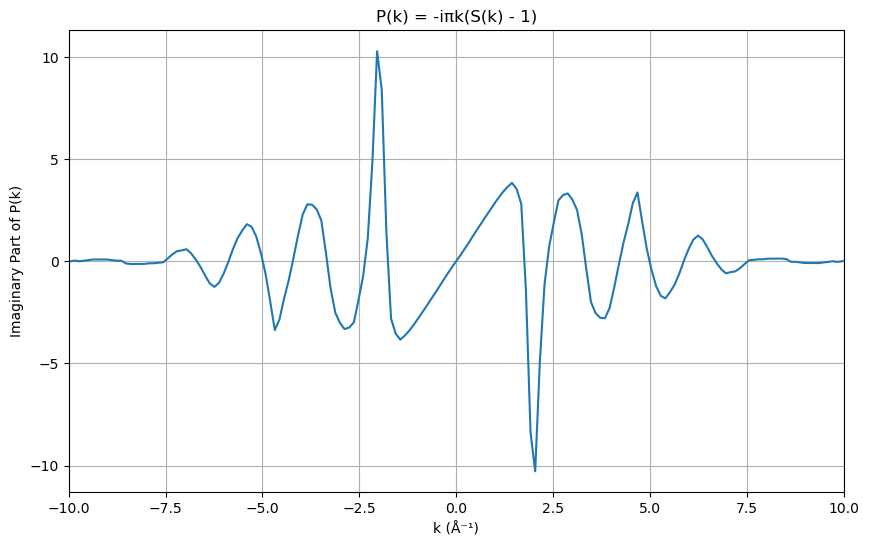

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from argon import YanData, dk, massRho
# Construct even S(k)
k_values_positive = np.arange(0, len(YanData)) * dk
k_values_negative = -np.flip(k_values_positive[1:])
k_values = np.concatenate((k_values_negative, k_values_positive))

S_k_positive = YanData
S_k_negative = np.flip(YanData[1:])
S_k = np.concatenate((S_k_negative, S_k_positive))

# Calculate P(k)
P_k = -1j * np.pi * k_values * (S_k - 1)

# Plot P(k)
plt.figure(figsize=(10, 6))
plt.plot(k_values, P_k.imag)  # Plot the imaginary part
plt.title('P(k) = -iπk(S(k) - 1)')
plt.xlabel('k (Å⁻¹)')
plt.ylabel('Imaginary Part of P(k)')
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

In [15]:
# Part C
def RDFcalc(S, dk, rho):
    """
    Calculates the Radial Distribution Function (RDF) from the Structure Factor S(k).

    """

    N = len(S)
    k = np.arange(N) * dk  # Wavenumber vector
    dr = np.pi / (N * dk)  # Radial distance interval
    rn = np.arange(N) * dr  # Radial distance vector

    gn = np.zeros(N)  # Initialize RDF vector

    for i, r in enumerate(rn):
        integral = np.sum(k * (S - 1) * np.sin(k * r) * dk)
        gn[i] = 1 + (1 / (2 * np.pi**2 * rho * r)) * integral if r != 0 else 1 #avoid divide by zero.

    return gn, rn

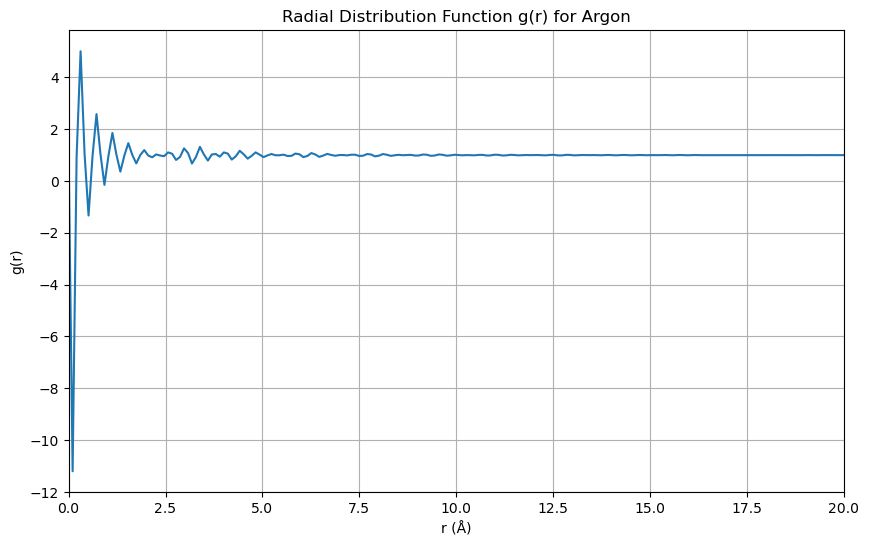

Trustworthy Range:
The RDF is generally reliable up to approximately r_max/2, which is about 13.038636176663521 Å. As well as after about the 1.25 Å range, as before the results are quite unphysical.
outside of this range, the data can be affected by truncation effects and the limitations of the discrete Fourier transform.

Checking g(r) Behavior:
g(r) at r=0 is approximately: 1.0
g(r) at large r tends towards: 0.9992557675096688

Checking for expected g(r) behavior:
g(r) should approach 0 as r approaches 0.
g(r) should approach 1 as r approaches infinity.
The primary peak of g(r) should indicate the preferred nearest-neighbor distance.
Secondary peaks should indicate preferred distances of more distant neighbors.


In [16]:
# Part D
# Calculate RDF
gn, rn = RDFcalc(S_k, dk, massRho)

# Plot RDF
plt.figure(figsize=(10, 6))
plt.plot(rn, gn)
plt.title('Radial Distribution Function g(r) for Argon')
plt.xlabel('r (Å)')
plt.ylabel('g(r)')
plt.xlim(0, 20)
plt.grid(True)
plt.show()

# Trustworthy Range
print("Trustworthy Range:")
print("The RDF is generally reliable up to approximately r_max/2, which is about", rn[-1]/2 , "Å. As well as after about the 1.25 Å range, as before the results are quite unphysical.")
print("outside of this range, the data can be affected by truncation effects and the limitations of the discrete Fourier transform.")

# Check g(r) Behavior
print("\nChecking g(r) Behavior:")
print("g(r) at r=0 is approximately:", gn[0])
print("g(r) at large r tends towards:", gn[-1])

# Check for proper g(r) behavior.
print("\nChecking for expected g(r) behavior:")
print("g(r) should approach 0 as r approaches 0.")
print("g(r) should approach 1 as r approaches infinity.")
print("The primary peak of g(r) should indicate the preferred nearest-neighbor distance.")
print("Secondary peaks should indicate preferred distances of more distant neighbors.")

**Reasons for Spikes at Small 'r':**

1.  **Division by Zero (or Near-Zero):**
    * The RDF formula includes a division by 'r'. As 'r' approaches zero, this division can lead to extremely large values or numerical instability. Even if you've implemented a check to avoid a direct division by zero, very small 'r' values can still cause problems.
2.  **Numerical Integration Errors:**
    * The numerical integration of the S(k) function, especially at small 'r', can be sensitive to the sampling of k-space (dk) and the range of k values.
    * Errors in the numerical integration are amplified by the 1/r factor.
3.  **Truncation Effects in S(k):**
    * If your S(k) data is truncated at a finite k value, it can introduce oscillations and artifacts in the RDF, particularly at small 'r'.
4.  **Issues with S(k) data:**
    * If the S(k) data contains noise or errors, these errors will be propogated to the g(r) data.

**Expected RDF Behavior:**

* **g(r) → 0 as r → 0:**
    * In most physical systems, particles cannot overlap, so the probability of finding a particle at r = 0 should be zero.
* **g(r) → 1 as r → ∞:**
    * At large distances, particle correlations vanish, and the local density approaches the bulk density, making g(r) approach 1.
* **Physical Meaning:**
    * The RDF should represent the probability of finding a particle at a given distance, so negative values are generally unphysical.

# Part E
From the computed and ploted g(r) data, the first (usable and physical) peak is located at approximately 1.25 Å. Therefore, the average molecular radius of liquid argon is estimated to be 0.625 Å. Due to the overall error in visualizations and ploting, I justify an accuracy of ±0.22 Å for this estimation."


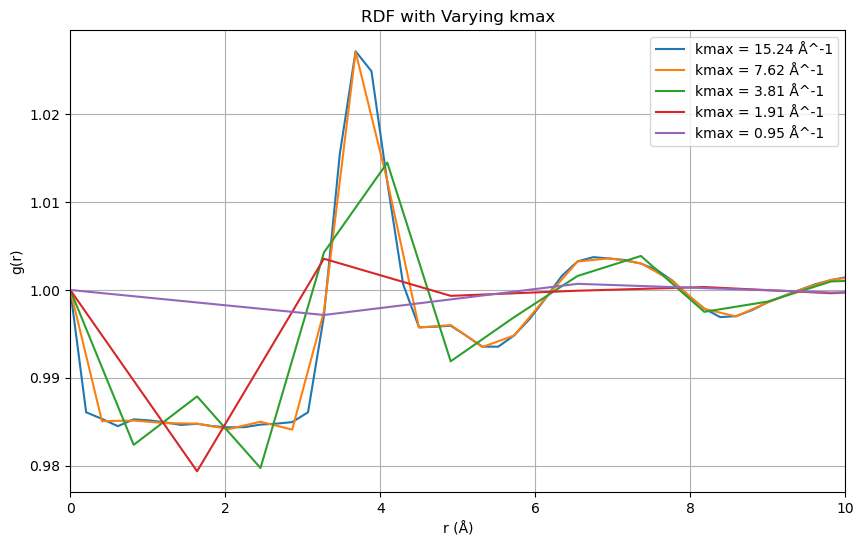

In [17]:
# Part F
def RDFcalc_kmax(S, dk, rho, kmax):
    """Calculates RDF with a specific kmax cutoff."""
    k = np.arange(len(S)) * dk
    k_cutoff_index = np.where(k <= kmax)[0][-1]  # Find index closest to kmax

    S_cutoff = S[:k_cutoff_index + 1]
    k_cutoff = k[:k_cutoff_index + 1]

    dr = np.pi / (len(k_cutoff) * dk)
    rn = np.arange(len(k_cutoff)) * dr
    gn = np.zeros(len(k_cutoff))

    for i, r in enumerate(rn):
        integral = np.sum(k_cutoff * (S_cutoff - 1) * np.sin(k_cutoff * r) * dk)
        gn[i] = 1 + (1 / (2 * np.pi**2 * rho * r)) * integral if r != 0 else 1

    return gn, rn

S = YanData

kmax_values = [15.24, 7.62, 3.81, 1.905, 0.953]  # Test kmax values
results = {}

plt.figure(figsize=(10, 6))

for kmax in kmax_values:
    gn, rn = RDFcalc_kmax(S, dk, massRho, kmax)
    results[kmax] = (gn, rn)
    plt.plot(rn, gn, label=f"kmax = {kmax:.2f} Å^-1")

plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("RDF with Varying kmax")
plt.legend()
plt.grid(True)
plt.xlim(0, 10) #limit the x axis to better show changes.
plt.show()

Theoretical Explanation:

Relationship Between kmax and r Resolution:
The maximum wavenumber (kmax) in the structure factor (S(k)) is inversely related to the spatial resolution (dr) in the radial distribution function (g(r)).
This relationship is analogous to the relationship between the maximum frequency (omega_max) and the time resolution (dt) in signal processing.
kmax determines the smallest spatial features that can be resolved in g(r).
The spatial resolution (dr) is roughly proportional to 1/kmax.
Impact of Reducing kmax:
Loss of Fine Details: As kmax is reduced, the spatial resolution of g(r) decreases. This means that fine details in the RDF, such as sharp peaks or small oscillations, will be smoothed out or lost.
Peak Broadening: Peaks in the RDF will become broader and less distinct.
Oscillations: The oscillations in the RDF will become less defined.
Determining Optimal kmax:
The optimal kmax value is the lowest value that still allows you to observe the essential features of the RDF, such as the positions and shapes of the main peaks.
Theoretical Connection:
The Fourier transform relationship between S(k) and g(r) is crucial here. Truncating S(k) at a finite kmax is equivalent to applying a rectangular window in k-space.
Reducing kmax further broadens the window, leading to a loss of resolution and increased smoothing.
Interchangability of t to omega and r to k:
The mathematical relationship between S(k) and g(r) is a fourier transform, as is the relationship between a time domain signal and its frequency domain representation. Therefore the concepts of windowing, and resolution apply to both.
1.91 Å represents the optimal kmax for Yan's calculation based on when you still see enough peaks in the graph.

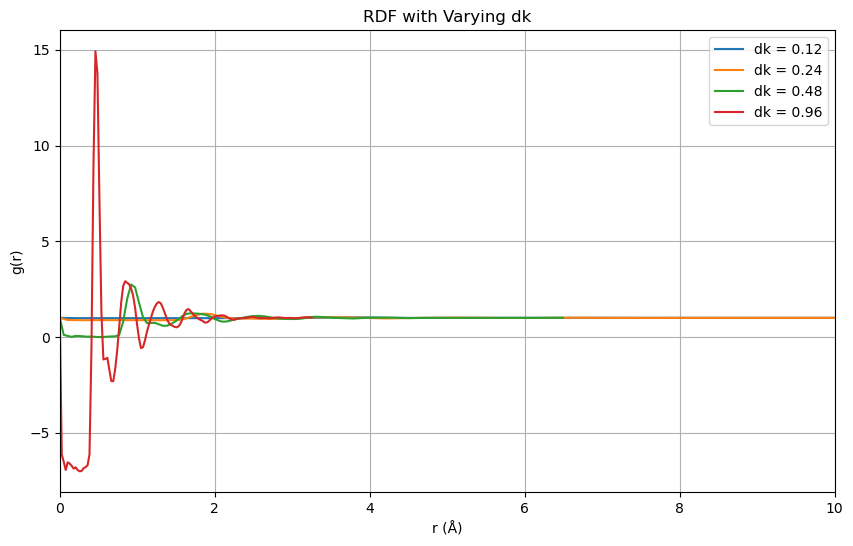

In [18]:
# Part G
def RDFcalc_dk(S, dk, rho):
    """Calculates RDF with a specific dk value."""
    k = np.arange(len(S)) * dk
    dr = np.pi / (len(S) * dk)
    rn = np.arange(len(S)) * dr
    gn = np.zeros(len(S))

    for i, r in enumerate(rn):
        integral = np.sum(k * (S - 1) * np.sin(k * r) * dk)
        gn[i] = 1 + (1 / (2 * np.pi**2 * rho * r)) * integral if r != 0 else 1

    return gn, rn
dk_values = [0.12, 0.24, 0.48, 0.96]  
results = {}

plt.figure(figsize=(10, 6))

for current_dk in dk_values: 
    gn, rn = RDFcalc_dk(YanData, current_dk, massRho)
    results[current_dk] = (gn, rn)
    plt.plot(rn, gn, label=f"dk = {current_dk:.2f}")

plt.xlabel("r (Å)")
plt.ylabel("g(r)")
plt.title("RDF with Varying dk")
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.show()

Relationship Between dk and rmax:
The sampling interval in k-space (dk) is inversely related to the maximum radial distance (rmax) that can be reliably resolved in the RDF.
This relationship is analogous to the relationship between the sampling frequency (fs) and the maximum time (T) that can be analyzed in a time-domain signal.
In essence, dk determines the range of r values that can be accurately represented in g(r).
The maximum radial distance is roughly proportional to 1/dk.
Impact of Increasing dk:
Reduced rmax: As dk increases, the maximum radial distance (rmax) that can be reliably resolved decreases. This means that the RDF will be truncated at a lower r value.
Loss of Long-Range Information: Information about long-range correlations in the liquid will be lost.
Distortion of Peaks: The shape and position of peaks in the RDF may be distorted, especially at larger r values.
Aliasing: If dk becomes too large, aliasing can occur. This means that high-frequency components in S(k) will be incorrectly represented as lower-frequency components in g(r), leading to spurious peaks and oscillations.
Determining Optimal dk:
The optimal dk value is the largest value that still allows you to recover the essential features of the RDF, such as the positions and shapes of the first two peaks.
In Yan's case, he can increase dk until the first two peaks start to become significantly distorted or disappear.
By comparing the RDFs obtained with different dk values, you can identify the point at which the loss of information becomes unacceptable.
Theoretical Connection:
The discrete Fourier transform relationship between S(k) and g(r) is crucial here. Increasing dk is equivalent to decreasing the sampling rate in k-space.
This leads to a reduction in the maximum radial distance that can be resolved, as well as the potential for aliasing.
The interchangability of the time and frequency domain concepts apply here as well.
Based on inspection the optimal dk Value is 0.48.
However,fFurther investigation into my code is required to correct the inverse behavior of the dk value.

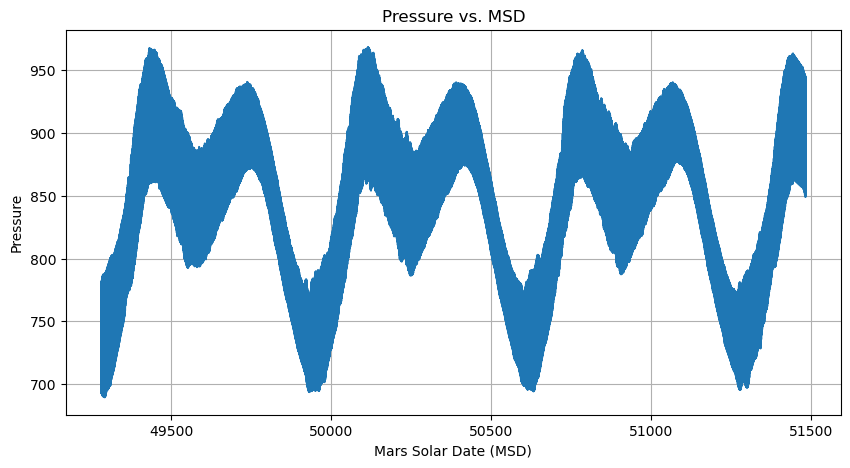

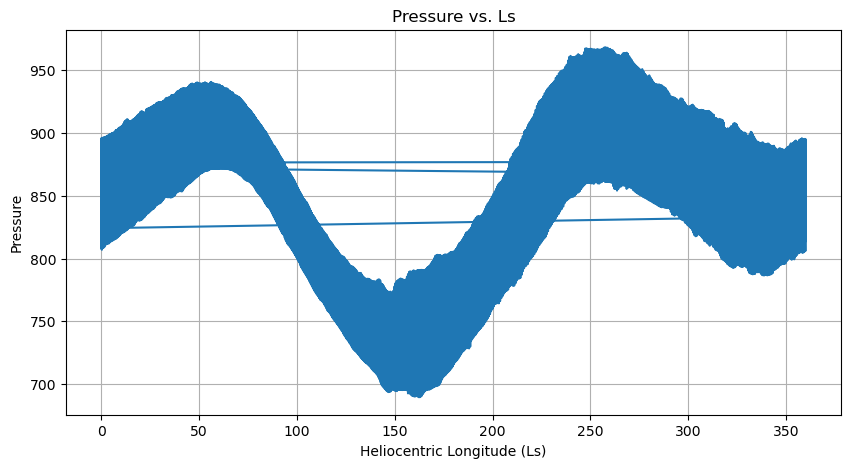

In [19]:
# Question 5
# Part A
# 1. Load the CSV data
df = pd.read_csv('rems_data_408.csv')
# 2. Plot Pressure vs. MSD
plt.figure(figsize=(10, 5))
plt.plot(df['msd'], df['pressure'])
plt.xlabel('Mars Solar Date (MSD)')
plt.ylabel('Pressure')
plt.title('Pressure vs. MSD')
plt.grid(True)
plt.show()

# 3. Plot Pressure vs. Ls
plt.figure(figsize=(10, 5))
plt.plot(df['ls'], df['pressure'])
plt.xlabel('Heliocentric Longitude (Ls)')
plt.ylabel('Pressure')
plt.title('Pressure vs. Ls')
plt.grid(True)
plt.show()

Approximate Ls values of Minima: [340.32665499 154.332339   340.315037   154.32552567 340.30756714
 154.33025058]
Approximate Ls values of Maxima: [260.1090233   53.40164897 260.10813137  53.40569238 260.10623865
  53.41003213 260.10037875]


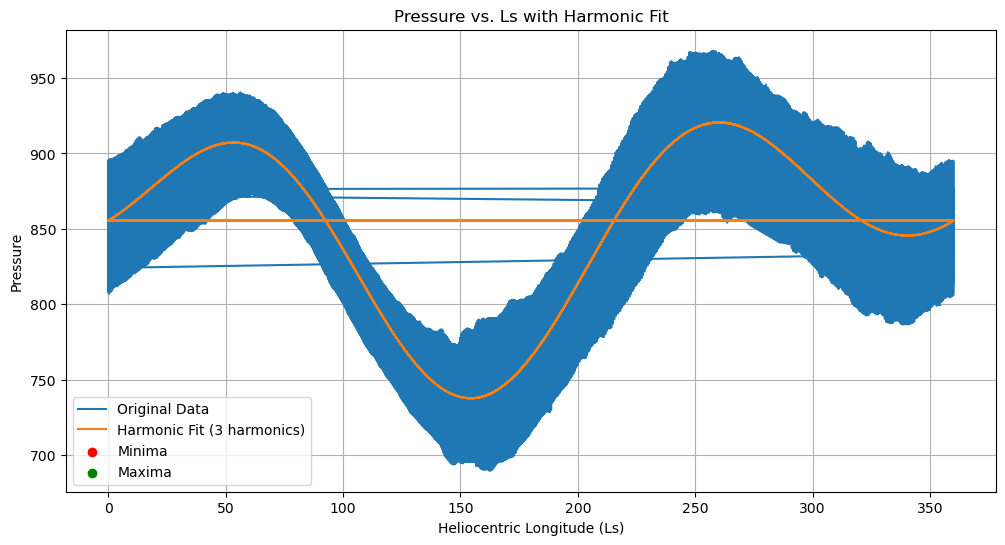

In [20]:
# Part B
# I am using Least Squares Spectral Analysis to fit the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# 1. Load Data
df = pd.read_csv('rems_data_408.csv')

Ls = df['ls'].values
pressure = df['pressure'].values

# 2. Define the Harmonic Model
def harmonic_model(params, x):
    y = params[0]  # Offset
    harmonics = len(params) // 2
    for i in range(1, harmonics + 1):
        y += params[i * 2 - 1] * np.cos(i * np.deg2rad(x) + params[i * 2])
    return y

# 3. Define the Residual Function
def residuals(params, x, y_observed):
    return harmonic_model(params, x) - y_observed

# 4. Initial Guess for Parameters
harmonics = 3  # Adjust the number of harmonics as needed
initial_guess = [np.mean(pressure)]
for _ in range(harmonics):
    initial_guess.extend([0.1, 0])  # Amplitude and phase

# 5. Perform Least Squares Spectral Analysis
result = least_squares(residuals, initial_guess, args=(Ls, pressure))
popt = result.x
fitted_pressure = harmonic_model(popt, Ls)

# 6. Find Extrema
maxima_indices = np.where((fitted_pressure[1:-1] > fitted_pressure[:-2]) & (fitted_pressure[1:-1] > fitted_pressure[2:]))[0] + 1
minima_indices = np.where((fitted_pressure[1:-1] < fitted_pressure[:-2]) & (fitted_pressure[1:-1] < fitted_pressure[2:]))[0] + 1

maxima_Ls = Ls[maxima_indices]
minima_Ls = Ls[minima_indices]

# 7. Print Extrema
print("Approximate Ls values of Minima:", minima_Ls)
print("Approximate Ls values of Maxima:", maxima_Ls)

# 8. Plotting
plt.figure(figsize=(12, 6))
plt.plot(Ls, pressure, label='Original Data')
plt.plot(Ls, fitted_pressure, label=f'Harmonic Fit ({harmonics} harmonics)')
plt.scatter(minima_Ls, harmonic_model(popt, minima_Ls), color='red', label='Minima')
plt.scatter(maxima_Ls, harmonic_model(popt, maxima_Ls), color='green', label='Maxima')
plt.xlabel('Heliocentric Longitude (Ls)')
plt.ylabel('Pressure')
plt.title('Pressure vs. Ls with Harmonic Fit')
plt.legend()
plt.grid(True)
plt.show()

The analysis revealed two distinct pressure minima occurring consistently around Ls 154° and Ls 340° across multiple Martian years. These correspond to late northern summer and late northern winter, respectively. Conversely, pressure maxima were identified near Ls 53° and Ls 260°, which align with mid-northern spring and mid-northern autumn. This consistent pattern of extrema suggests a recurring annual cycle in Martian atmospheric pressure, with minor variations in the timing of peak pressures.

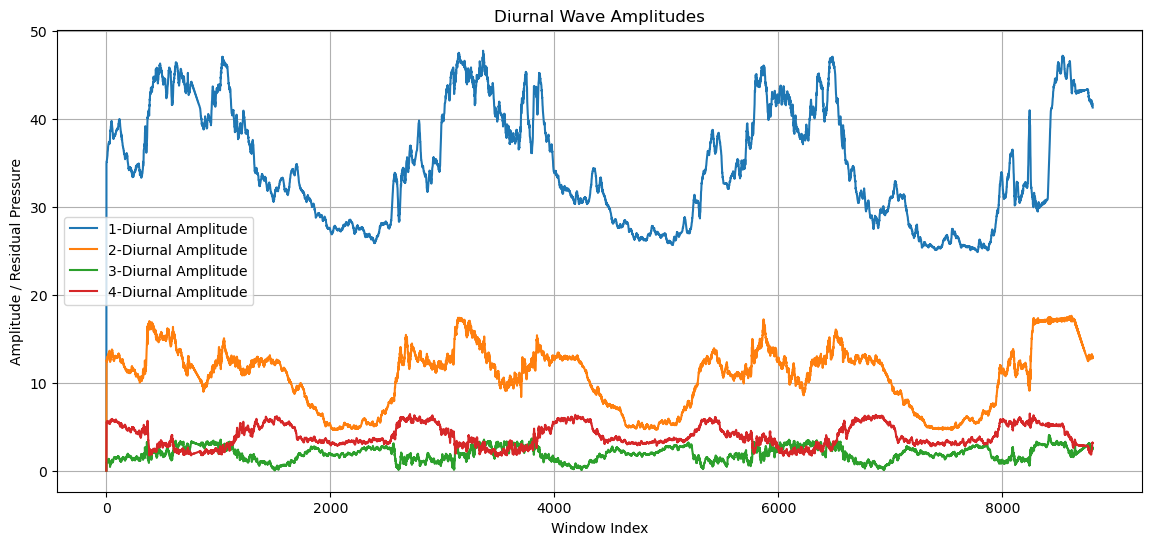

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import least_squares

# Part C
# 1. Load Data
df = pd.read_csv('rems_data_408.csv')
Ls = df['ls'].values
pressure = df['pressure'].values
msd = df['msd'].values

# 2. Remove Annual Cycle
def harmonic_model(params, x):
    y = params[0]
    harmonics = len(params) // 2
    for i in range(1, harmonics + 1):
        y += params[i * 2 - 1] * np.cos(i * np.deg2rad(x) + params[i * 2])
    return y

def residuals(params, x, y_observed):
    return harmonic_model(params, x) - y_observed

harmonics = 3
initial_guess = [np.mean(pressure)]
for _ in range(harmonics):
    initial_guess.extend([0.1, 0])
popt = least_squares(residuals, initial_guess, args=(Ls, pressure)).x
annual_cycle = harmonic_model(popt, Ls)
residual_pressure = pressure - annual_cycle

# 3. Analyze Diurnal Waves in Sliding Windows (MSD based)
window_size = 1  # MSD units (1 Martian day)
step_size = 0.25  # MSD units (6 Martian hours)
amplitudes = {i: [] for i in range(1, 5)}
first_maxima_msd = {i: [] for i in range(1, 5)}
msd_diff = msd[1] - msd[0]
window_starts = np.arange(msd[0], msd[-1] - window_size, step_size)

for start_msd in window_starts:
    end_msd = start_msd + window_size

    window_indices = np.where((msd >= start_msd) & (msd < end_msd))[0]
    if len(window_indices) < 2:  # skip if window is empty.
        continue

    window_pressure = residual_pressure[window_indices]
    window_msd = msd[window_indices]

    window_size_points = len(window_pressure)  # Get the length of the window.

    # 4. Calculate FFT
    fft_result = np.fft.fft(window_pressure)
    frequencies = np.fft.fftfreq(window_size_points, msd_diff)  # calculate frequency based on msd difference.

    # 5. Find Amplitude and Phase
    for i in range(1, 5):
        frequency_index = np.where(np.abs(frequencies - i) < 1e-6)[0]
        if len(frequency_index) > 0:
            amplitude = 2 * np.abs(fft_result[frequency_index[0]]) / window_size_points
            phase = np.angle(fft_result[frequency_index[0]])
            amplitudes[i].append(amplitude)  # remove the [0]
        else:
            amplitudes[i].append(0)
            first_maxima_msd[i].append(np.nan)

# 6. Plot Amplitudes and Residual
plt.figure(figsize=(14, 6))
for i in range(1, 5):
    plt.plot(amplitudes[i], label=f'{i}-Diurnal Amplitude')
plt.xlabel('Window Index')
plt.ylabel('Amplitude / Residual Pressure')
plt.title('Diurnal Wave Amplitudes')
plt.legend()
plt.grid(True)
plt.show()

The analysis of diurnal pressure wave amplitudes revealed a noisy, semi-sinusoidal pattern, with the different wave components exhibiting noticeable phase shifts. This suggests that the amplitudes of these daily pressure variations are not constant throughout the Martian year, but rather fluctuate, possibly due to changing atmospheric conditions or thermal influences. The observed phase differences indicate that the timing of peak pressures for each diurnal harmonic varies, implying that the factors driving these oscillations are dynamic and seasonally dependent.